In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
import datetime as dt
from datetime import date,timedelta
from numpy import array

In [2]:
# Load the closing price file
file="predictions2000s.56d.15e.100ip.csv"
predictions_df=pd.read_csv(file)
predictions_df.head()

,Date,SecuritiesCode,Close
0,2021-12-06,1301,2992.687054
1,2021-12-06,1332,579.618975
2,2021-12-06,1333,2367.621644
3,2021-12-06,1376,1419.280200
4,2021-12-06,1377,3264.182692


In [3]:
# create a list of all the securities
one_date_df=predictions_df.loc[(predictions_df['Date']==predictions_df['Date'][0]),['SecuritiesCode']]
securities=one_date_df['SecuritiesCode'].tolist()

In [4]:
# getting close prices for all SecuritiesCodes
prices_target = predictions_df.pivot(index='Date', columns='SecuritiesCode', values='Close')
prices_target = prices_target.dropna()
prices_target.head()

SecuritiesCode,1301,1332,1333,1376,1377,1379,1381,1407,1414,1417,...,9982,9983,9984,9987,9989,9990,9991,9993,9994,9997
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,2992.687054,579.618975,2367.621644,1419.280200,3264.182692,1922.352161,3262.643459,5295.995129,5077.783241,1947.960042,...,1752.308325,70702.067757,6771.672182,3168.098474,3127.299701,571.094738,820.784492,1720.982253,2382.383211,702.030116
2021-12-07,2980.222656,576.933613,2357.939207,1411.282416,3251.264660,1918.572289,3260.844272,5253.695422,5074.373200,1938.751673,...,1749.397368,70132.033935,6683.844220,3165.543545,3108.083855,568.207305,818.730381,1717.966534,2376.382090,697.417271
2021-12-08,2969.970184,574.774925,2350.475694,1404.414156,3241.359165,1915.941430,3261.397777,5189.168161,5072.821195,1930.094008,...,1747.179181,69588.363129,6608.578176,3165.265120,3092.636060,565.540172,817.544313,1715.451331,2372.232862,693.499663
2021-12-09,2961.932126,573.068998,2344.953066,1398.905295,3234.495904,1914.363920,3264.314954,5104.726051,5073.271339,1921.909391,...,1745.754321,69088.580105,6550.910220,3166.965901,3081.155512,563.227454,817.224284,1713.600392,2369.709041,690.218561
2021-12-10,2955.841259,571.730837,2341.003534,1394.784215,3230.370972,1913.655008,3269.361198,5004.539302,5075.559325,1914.125307,...,1745.090605,68639.294583,6511.678794,3170.262341,3073.340414,561.331600,817.677052,1712.431391,2368.481307,687.473304


In [5]:
# first 200 values of SecuritiesCodes for every time step(1202).
first_200 = []
for i in range(0,len(prices_target.index),1):
      first_200.append(-np.sort(-prices_target.iloc[i, :].values)[:200])
prices_target_first_200 = pd.DataFrame(first_200,index=prices_target.index)
prices_target_first_200.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,71551.889733,70702.067757,68093.018444,58827.079497,50087.421035,41934.962439,39942.681808,34540.682610,31615.829105,28329.872109,...,5103.188485,5077.783241,5068.837800,5065.776041,5051.308806,5043.865195,5040.485319,5034.640016,5025.893506,5021.600738
2021-12-07,71325.185979,70132.033935,67878.522490,58826.859056,50108.222667,41636.742046,39972.581291,34569.773399,31434.792652,28234.659450,...,5087.030342,5084.841203,5074.373200,5068.152361,5039.253534,5034.938864,5032.981740,5019.164329,5005.601797,5001.079306
2021-12-08,70990.564344,69588.363129,67616.460635,58757.059913,50111.914874,41260.657539,40050.940161,34547.856126,31250.984110,28040.203449,...,5057.820274,5051.283524,5050.459421,5045.420953,5038.122918,5019.994184,5017.324330,5012.173731,5002.927647,4985.865511
2021-12-09,70563.964543,69088.580105,67311.686411,58630.396250,50098.906986,40809.616178,40178.497419,34475.923682,31061.997751,27754.659548,...,5037.206474,5036.847882,5034.952042,5014.559915,4999.084413,4994.131409,4989.134640,4984.999620,4976.147130,4975.126452
2021-12-10,70064.530478,68639.294583,66972.934252,58459.579141,50071.352790,40349.486113,40296.843064,34359.805497,30866.736062,27395.067394,...,5002.990064,4999.715465,4980.627144,4973.043449,4972.736776,4966.534458,4966.128963,4965.088346,4964.171469,4948.326142


In [6]:
# last 200 values of SecuritiesCodes for every time step(1202).
last_200 = []
for i in range(0,len(prices_target.index),1):
      last_200.append(np.sort(prices_target.iloc[i, :].values)[0:200])
prices_target_last_200 = pd.DataFrame(last_200,index=prices_target.index)
prices_target_last_200.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,38.879240,51.732458,69.204530,126.633130,130.664778,141.175978,151.733603,151.819693,153.168594,153.365114,...,648.750553,649.468535,652.552701,654.812164,656.650400,662.969441,663.683295,664.953002,668.204780,668.249012
2021-12-07,38.819498,51.480043,68.484828,125.903005,129.520606,140.482277,148.655849,148.959740,151.367287,153.066338,...,645.346721,647.467410,649.246523,650.088600,654.160473,659.317054,659.490501,660.976045,667.208825,669.319930
2021-12-08,38.769582,51.270668,67.878965,125.297692,128.566797,140.015253,142.829131,145.474878,151.047713,153.068535,...,639.568290,647.899788,649.411147,650.085652,652.043396,652.896746,656.080076,658.651432,661.496643,664.262037
2021-12-09,38.739564,51.109924,67.400039,124.805920,127.815919,135.619618,139.761275,141.384839,150.764241,153.319389,...,637.832425,645.957421,647.725054,648.428570,649.762559,650.295493,652.360118,653.392273,656.810154,660.049465
2021-12-10,38.732416,50.994892,67.044567,124.410611,127.171224,127.259280,136.767218,139.685301,150.507626,153.761475,...,636.247479,637.360459,644.220444,645.762754,648.876079,650.172711,651.281629,654.246102,655.457876,657.570130


In [7]:
weights = np.linspace(start=2, stop=1, num=200)
weights

array([2.        , 1.99497487, 1.98994975, 1.98492462, 1.9798995 ,
       1.97487437, 1.96984925, 1.96482412, 1.95979899, 1.95477387,
       1.94974874, 1.94472362, 1.93969849, 1.93467337, 1.92964824,
       1.92462312, 1.91959799, 1.91457286, 1.90954774, 1.90452261,
       1.89949749, 1.89447236, 1.88944724, 1.88442211, 1.87939698,
       1.87437186, 1.86934673, 1.86432161, 1.85929648, 1.85427136,
       1.84924623, 1.84422111, 1.83919598, 1.83417085, 1.82914573,
       1.8241206 , 1.81909548, 1.81407035, 1.80904523, 1.8040201 ,
       1.79899497, 1.79396985, 1.78894472, 1.7839196 , 1.77889447,
       1.77386935, 1.76884422, 1.7638191 , 1.75879397, 1.75376884,
       1.74874372, 1.74371859, 1.73869347, 1.73366834, 1.72864322,
       1.72361809, 1.71859296, 1.71356784, 1.70854271, 1.70351759,
       1.69849246, 1.69346734, 1.68844221, 1.68341709, 1.67839196,
       1.67336683, 1.66834171, 1.66331658, 1.65829146, 1.65326633,
       1.64824121, 1.64321608, 1.63819095, 1.63316583, 1.62814

In [8]:
Sup=((prices_target_first_200 * weights).sum(axis = 1))/np.mean(weights)
Sup

Date
2021-12-06    2.316061e+06
2021-12-07    2.304509e+06
2021-12-08    2.292667e+06
2021-12-09    2.280770e+06
2021-12-10    2.269045e+06
2021-12-13    2.257708e+06
2021-12-14    2.246714e+06
2021-12-15    2.236045e+06
2021-12-16    2.225752e+06
2021-12-17    2.215985e+06
2021-12-20    2.206622e+06
2021-12-21    2.197543e+06
2021-12-22    2.188729e+06
2021-12-23    2.180206e+06
2021-12-24    2.171947e+06
2021-12-27    2.163946e+06
2021-12-28    2.156173e+06
2021-12-29    2.148616e+06
2021-12-30    2.141355e+06
2022-01-04    2.134359e+06
2022-01-05    2.127571e+06
2022-01-06    2.121034e+06
2022-01-07    2.114757e+06
2022-01-11    2.108746e+06
2022-01-12    2.102952e+06
2022-01-13    2.097357e+06
2022-01-14    2.091945e+06
2022-01-17    2.086738e+06
2022-01-18    2.081738e+06
2022-01-19    2.076935e+06
2022-01-20    2.072314e+06
2022-01-21    2.067854e+06
2022-01-24    2.063560e+06
2022-01-25    2.059501e+06
2022-01-26    2.055591e+06
2022-01-27    2.051826e+06
2022-01-28    2.048239e

In [9]:
Sdown=((prices_target_last_200 * weights).sum(axis = 1))/np.mean(weights)
Sdown

Date
2021-12-06    83417.934421
2021-12-07    82994.157655
2021-12-08    82638.833249
2021-12-09    82358.757945
2021-12-10    82150.652541
2021-12-13    82001.127919
2021-12-14    81889.523121
2021-12-15    81808.960751
2021-12-16    81750.607803
2021-12-17    81698.297967
2021-12-20    81647.697296
2021-12-21    81512.165426
2021-12-22    81345.167692
2021-12-23    81106.224814
2021-12-24    80849.304144
2021-12-27    80589.898479
2021-12-28    80211.681081
2021-12-29    79803.261201
2021-12-30    79406.817727
2022-01-04    79028.062323
2022-01-05    78672.613524
2022-01-06    78344.408016
2022-01-07    78036.430218
2022-01-11    77732.695717
2022-01-12    77417.112085
2022-01-13    77109.875471
2022-01-14    76807.488260
2022-01-17    76506.775798
2022-01-18    76210.844491
2022-01-19    75918.381458
2022-01-20    75629.487955
2022-01-21    75327.538299
2022-01-24    74860.613476
2022-01-25    74289.095996
2022-01-26    73706.005502
2022-01-27    73150.706652
2022-01-28    72626.770

In [10]:
(Sup - Sdown)

Date
2021-12-06    2.232643e+06
2021-12-07    2.221515e+06
2021-12-08    2.210029e+06
2021-12-09    2.198411e+06
2021-12-10    2.186894e+06
2021-12-13    2.175707e+06
2021-12-14    2.164825e+06
2021-12-15    2.154236e+06
2021-12-16    2.144001e+06
2021-12-17    2.134286e+06
2021-12-20    2.124974e+06
2021-12-21    2.116031e+06
2021-12-22    2.107384e+06
2021-12-23    2.099100e+06
2021-12-24    2.091098e+06
2021-12-27    2.083356e+06
2021-12-28    2.075961e+06
2021-12-29    2.068813e+06
2021-12-30    2.061949e+06
2022-01-04    2.055331e+06
2022-01-05    2.048899e+06
2022-01-06    2.042690e+06
2022-01-07    2.036721e+06
2022-01-11    2.031013e+06
2022-01-12    2.025535e+06
2022-01-13    2.020247e+06
2022-01-14    2.015138e+06
2022-01-17    2.010231e+06
2022-01-18    2.005527e+06
2022-01-19    2.001017e+06
2022-01-20    1.996685e+06
2022-01-21    1.992527e+06
2022-01-24    1.988699e+06
2022-01-25    1.985212e+06
2022-01-26    1.981885e+06
2022-01-27    1.978675e+06
2022-01-28    1.975612e

In [11]:
daily_spread_return = (Sup - Sdown).mean()/(Sup - Sdown).std()
daily_spread_return

23.551575810732725

In [12]:
count_SecuritiesCode_first_200 = prices_target.isin(prices_target_first_200.values.flatten())
True_first_200 = (count_SecuritiesCode_first_200.apply(pd.Series.value_counts, axis=0).fillna(0).iloc[1:2]).T
True_first_200 = True_first_200.add_prefix('first_200_')

In [13]:
count_SecuritiesCode_last_200 = prices_target.isin(prices_target_last_200.values.flatten())
True_last_200 = (count_SecuritiesCode_last_200.apply(pd.Series.value_counts, axis=0).fillna(0).iloc[1:2]).T
True_last_200 = True_last_200.add_prefix('last_200_')

In [14]:
Count = pd.concat([True_first_200,True_last_200],axis=1)
Count

,first_200_True,last_200_True
SecuritiesCode,,
1301,0.0,0.0
1332,0.0,56.0
1333,0.0,0.0
1376,0.0,0.0
1377,0.0,0.0
...,...,...
9990,0.0,56.0
9991,0.0,0.0
9993,0.0,0.0


In [15]:
SecuritiesCode_weight = (Count/len(prices_target.index)).sum(axis=1)/2

In [16]:
df_weight = pd.DataFrame(SecuritiesCode_weight,columns=["Weight"]).reset_index()

In [17]:
df_weight

,SecuritiesCode,Weight
0,1301,0.000000
1,1332,0.500000
2,1333,0.000000
3,1376,0.000000
4,1377,0.000000
...,...,...
1860,9990,0.500000
1861,9991,0.000000
1862,9993,0.000000
1863,9994,0.000000


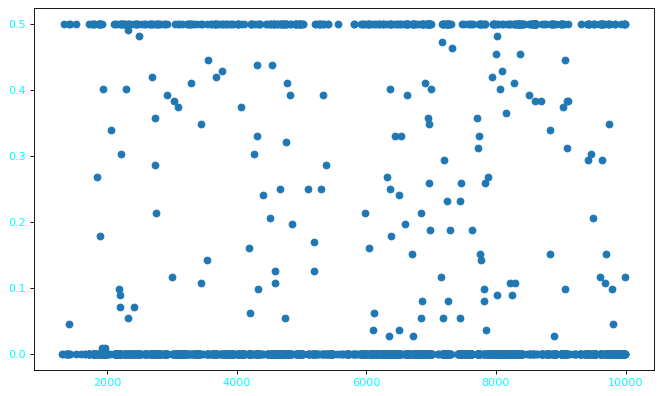

In [18]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(color='cyan')
plt.yticks(color='cyan')
plt.scatter(x=SecuritiesCode_weight.index,y=SecuritiesCode_weight)

In [19]:
Count.reset_index
Count.columns
top_ranked = Count.sort_values(by=['first_200_True'],ascending=False).iloc[0:200]

In [20]:
top_ranked = top_ranked.drop(columns='last_200_True',axis=1)
top_ranked

,first_200_True
SecuritiesCode,
4911,56.0
7741,56.0
9627,56.0
4516,56.0
8227,56.0
...,...
1852,30.0
6324,30.0
6965,29.0


In [21]:
top_ranked.to_csv('stacked_lstm_top_ranked.csv')

In [28]:
for i in range(200):
     print(top_ranked.index[i])

4911
7741
9627
4516
8227
4686
4523
6645
6146
9605
4684
6967
9601
9008
9020
7735
9021
9022
6701
6702
4507
2761
9631
9632
6963
4581
2801
4471
8035
6960
6201
2791
4025
6626
4023
9663
9661
6196
4021
6957
6954
6920
2702
6103
6861
4628
6857
9435
6856
3733
6758
6035
6030
2326
6762
6027
2477
7649
5918
3769
8111
5947
9441
6869
4661
3697
2670
6902
2651
7564
6728
9058
2217
2593
2222
2226
6080
2264
2590
2267
3914
2269
3906
6594
4704
6971
4816
9936
6367
1766
4970
1787
1793
3349
4985
4967
6465
7309
8595
4114
7974
2815
7826
6368
4966
4768
4928
6411
4901
7269
7276
4919
4922
1414
9984
7951
9983
6383
1515
8424
9974
3288
8439
3391
7832
3097
6273
9843
4716
5304
2897
9766
6516
4063
6532
9749
3597
3549
5332
6988
5344
6981
9735
9733
4452
6258
6586
5273
7476
8279
4365
3445
6323
3046
3465
8766
4733
1878
6806
6501
5217
1884
2331
7164
8369
9065
4307
4543
8088
3774
7947
2692
8283
6908
6361
4825
5331
9104
9107
3038
4062
9039
3088
6951
3443
9744
6966
8842
7734
9101
7729
2220
7203
9639
5384
1852
6324
6965
7458
7839
